In [1]:
# https://github.com/rajathkmp/FaceRecog/blob/master/faceRecog.ipynb
import cv2
import numpy as np
import os
# from skimage import io
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

import matplotlib.pyplot as plt
%matplotlib inline

/home/vagrant/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using TensorFlow backend.


In [2]:
# https://stackoverflow.com/a/32598876/1802483
men1 = cv2.imread('./men1.jpg')
men1 = cv2.cvtColor(men1, cv2.COLOR_BGR2GRAY)
men1 = cv2.equalizeHist(men1)

men2 = cv2.imread('./men2.jpg')
men2 = cv2.cvtColor(men2, cv2.COLOR_BGR2GRAY)
men2 = cv2.equalizeHist(men2)

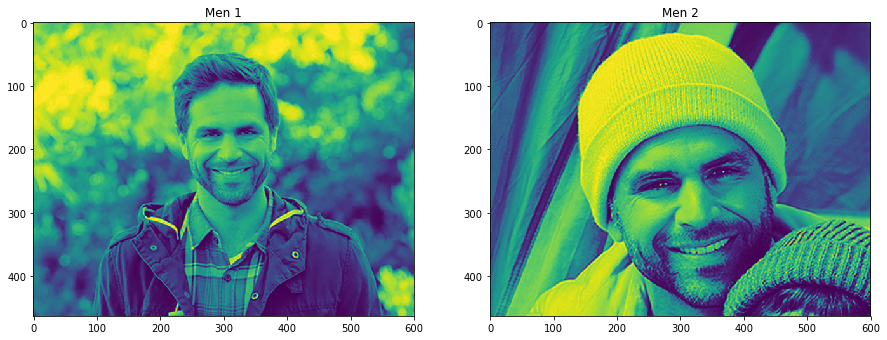

In [3]:
plt.figure(figsize=(15, 15))

plt.subplot(221)
plt.imshow(men1)
plt.title("Men 1")

plt.subplot(222)
plt.imshow(men2)
plt.title("Men 2")

plt.show()

In [4]:
# http://docs.opencv.org/master/d7/d8b/tutorial_py_face_detection.html
# https://github.com/opencv/opencv/blob/master/samples/python/facedetect.py
face_path = '/home/vagrant/anaconda3/pkgs/opencv3-3.1.0-py36_0/share/OpenCV/haarcascades/haarcascade_frontalface_default.xml';
face_cascade = cv2.CascadeClassifier(face_path)

# eye_path = '/home/vagrant/anaconda3/envs/tensorflow/share/OpenCV/haarcascades/haarcascade_eye.xml';
# eye_cascade = cv2.CascadeClassifier(eye_path)

In [5]:
men2

array([[ 55,  49,  45, ...,  70,  79,  79],
       [ 59,  51,  46, ...,  70,  70,  74],
       [ 59,  55,  49, ...,  62,  66,  66],
       ..., 
       [121, 127, 127, ...,  10,   7,   6],
       [122, 127, 125, ...,  11,   9,   6],
       [124, 127, 125, ...,  10,   9,   7]], dtype=uint8)

In [20]:
# facePoints1 = face_cascade.detectMultiScale(men1, scaleFactor=1.3, minNeighbors=5, minSize=(5, 5), flags=cv2.CASCADE_SCALE_IMAGE)
# facePoints2 = face_cascade.detectMultiScale(men2, scaleFactor=1.3, minNeighbors=5, minSize=(5, 5), flags=cv2.CASCADE_SCALE_IMAGE)

scaleFactor = 1.3
# default
minNeighbors = 3

facePoints1 = face_cascade.detectMultiScale(men1, scaleFactor=scaleFactor, minNeighbors = minNeighbors, flags=cv2.CASCADE_SCALE_IMAGE)
facePoints2 = face_cascade.detectMultiScale(men2, scaleFactor=scaleFactor, minNeighbors = minNeighbors, flags=cv2.CASCADE_SCALE_IMAGE)

print("facePoints1: ", facePoints1)
print("facePoints2: ", facePoints2)

facePoints1:  [[233 118 156 156]]
facePoints2:  [[178 129 312 312]]


In [21]:
cropped_width = cropped_height = 150

if(len(facePoints1) > 0):
    m1x,m1y = facePoints1[0][:2]
    men1_cropped = men1[m1y: m1y + cropped_width, m1x: m1x + cropped_height]
    x,y,w,h = facePoints1[0]
    cv2.rectangle(men1,(x,y),(x+w,y+h),(255,0,0),2)
else:
    men1_cropped = men1
    
if(len(facePoints2) > 0):
    m2x,m2y = facePoints2[0][:2]
    men2_cropped = men2[m2y: m2y + cropped_width, m2x: m2x + cropped_height]
    x,y,w,h = facePoints1[0]
    cv2.rectangle(men1,(x,y),(x+w,y+h),(255,0,0),2)
else:
    men2_cropped = men2

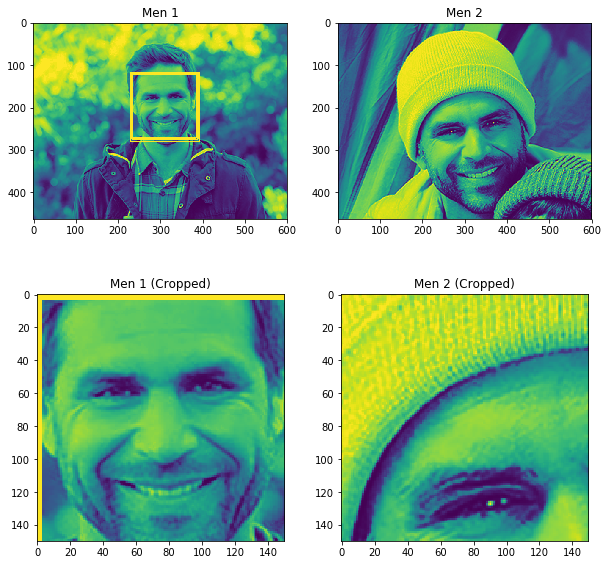

In [22]:
# Load Images: https://stackoverflow.com/questions/41530975/set-size-of-subplot-in-matplotlib
plt.figure(figsize=(10, 10))

plt.subplot(221)
plt.imshow(men1)
plt.title("Men 1")

plt.subplot(222)
plt.imshow(men2)
plt.title("Men 2")

plt.subplot(223)
plt.imshow(men1_cropped)
plt.title("Men 1 (Cropped)")

plt.subplot(224)
plt.imshow(men2_cropped)
plt.title("Men 2 (Cropped)")

plt.show()

In [9]:
# r_men1 = men1_cropped.reshape(1, 150*150)
# r_men2 = men2_cropped.reshape(1, 150*150)

# r_men1 = r_men1.astype('float32')
# r_men1 /= 255
# r_men2 = r_men2.astype('float32')
# r_men2 /= 255

In [10]:
# # If true/false, what is the number of class?
# number_of_class = 2

# model = Sequential()
# model.add(Dense(512,input_shape=(150*150,)))
# model.add(Activation('relu'))
# model.add(Dropout(0.2))
# model.add(Dense(512))
# model.add(Activation('relu'))
# model.add(Dropout(0.2))
# model.add(Dense(number_of_class))
# model.add(Activation('softmax'))

In [11]:
# model.summary()

In [12]:
# model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

In [13]:
# What is Y_train?
# model.fit(X_train, Y_train, batch_size=1, epoch=10, verbose=1)